# Part I - (Loan Data from Prosper)
## by (Chinenye Mercy Nnabude)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Analysis</a></li>
<li><a href="#bivariate">Bivariate Analysis</a></li>
<li><a href="#multivariate">Multivariate Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction
> This work entails a detailed exploration of Loan Data from Prosper dataset, this data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate or interest rate, current loan status, borrower income, and many other variable.
In an attempt to explore this Dataset and answer the questions of interest, I would be carrying Data wrangling and Data Visualization steps in the cells below, using python plotting libraries Matplotlib, Seaborn and other libraries.

 


<a id='wrangling'></a>
## Preliminary Wrangling
> I would be perfoming wrangling steps on my dataset in the cells to come below by Gahtering, Assessing and cleaning up the dataset, in order to answer the following questions below.

>1. What factors affect a loan’s outcome status?


>2. What affects the borrower’s APR or interest rate?




In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> In the cell below, I would be loading my Loan data dataset into a pandas dataframe (loan_df) to further access, investigate and explore the dataset


In [2]:
#Load dataset

loan_df = pd.read_csv('prosperLoanData.csv', sep = ',')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#check data dimension
loan_df.shape


(113937, 81)

In [27]:
#select variables of interest
loan_data = loan_df[['LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'Term', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DelinquenciesLast7Years', 'IncomeRange', 'Recommendations', 'AvailableBankcardCredit']]
loan_data.head()

,LoanStatus,BorrowerAPR,BorrowerRate,Term,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DelinquenciesLast7Years,IncomeRange,Recommendations,AvailableBankcardCredit
0,Completed,0.16516,0.1580,36,Self-employed,2.0,True,4.0,"$25,000-49,999",0,1500.0
1,Current,0.12016,0.0920,36,Employed,44.0,False,0.0,"$50,000-74,999",0,10266.0
2,Completed,0.28269,0.2750,36,Not available,NaN,False,0.0,Not displayed,0,NaN
3,Current,0.12528,0.0974,36,Employed,113.0,True,14.0,"$25,000-49,999",0,30754.0
4,Current,0.24614,0.2085,36,Employed,44.0,True,0.0,"$100,000+",0,695.0


In [6]:
#checking the general information ofthe dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   LoanStatus                113937 non-null  object 
 1   BorrowerAPR               113912 non-null  float64
 2   BorrowerRate              113937 non-null  float64
 3   Term                      113937 non-null  int64  
 4   EmploymentStatus          111682 non-null  object 
 5   EmploymentStatusDuration  106312 non-null  float64
 6   IsBorrowerHomeowner       113937 non-null  bool   
 7   CurrentDelinquencies      113240 non-null  float64
 8   DelinquenciesLast7Years   112947 non-null  float64
 9   IncomeRange               113937 non-null  object 
 10  Recommendations           113937 non-null  int64  
 11  AvailableBankcardCredit   106393 non-null  float64
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 9.7+ MB


In [7]:
#delete rows with missing values
loan_data.dropna()

,LoanStatus,BorrowerAPR,BorrowerRate,Term,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentDelinquencies,DelinquenciesLast7Years,IncomeRange,Recommendations,AvailableBankcardCredit
0,Completed,0.16516,0.1580,36,Self-employed,2.0,True,2.0,4.0,"$25,000-49,999",0,1500.0
1,Current,0.12016,0.0920,36,Employed,44.0,False,0.0,0.0,"$50,000-74,999",0,10266.0
3,Current,0.12528,0.0974,36,Employed,113.0,True,4.0,14.0,"$25,000-49,999",0,30754.0
4,Current,0.24614,0.2085,36,Employed,44.0,True,0.0,0.0,"$100,000+",0,695.0
5,Current,0.15425,0.1314,60,Employed,82.0,True,0.0,0.0,"$100,000+",0,86509.0
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,Current,0.22354,0.1864,36,Employed,246.0,True,0.0,7.0,"$50,000-74,999",0,1886.0
113933,FinalPaymentInProgress,0.13220,0.1110,36,Employed,21.0,True,1.0,4.0,"$75,000-99,999",0,6658.0
113934,Current,0.23984,0.2150,60,Employed,84.0,True,0.0,0.0,"$25,000-49,999",0,7853.0
113935,Completed,0.28408,0.2605,60,Full-time,94.0,True,0.0,0.0,"$25,000-49,999",0,4137.0


### What is the structure of your dataset?

> The dataset contains 113937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

<a id='univariate'></a>
## Univariate Exploration

>In the cell below I am carrying out a univariate analysis on the **Employment Status** variable inorder to investigate what status the larger number of the population in the dataset falls under.
The _EmploymentStatus_ feature contains categorical data so I would be using a bar chart to visualise.

>From the plot below, it is observed a larger group of people taking a loan are employed.

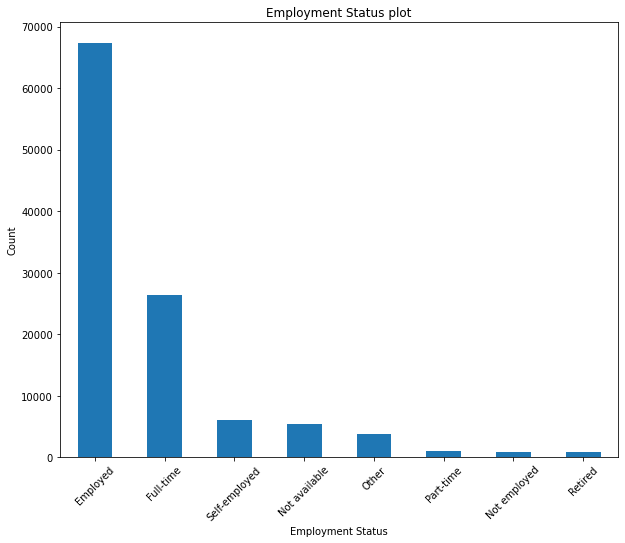

In [8]:
#Bar chart visualising the EmploymentStatus feature
loan_data['EmploymentStatus'].value_counts().plot(kind='bar', figsize=(10,8));
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Employment Status plot')
plt.xticks(rotation=45)
plt.show()

>In the cell below I am carrying out a univariate analysis on the **IsBorrowerHomeowner** variable inorder to investigate if a loan applicant owns a home or not, A home would be a good loan collateral to qualitfy and improve borrower rate. 

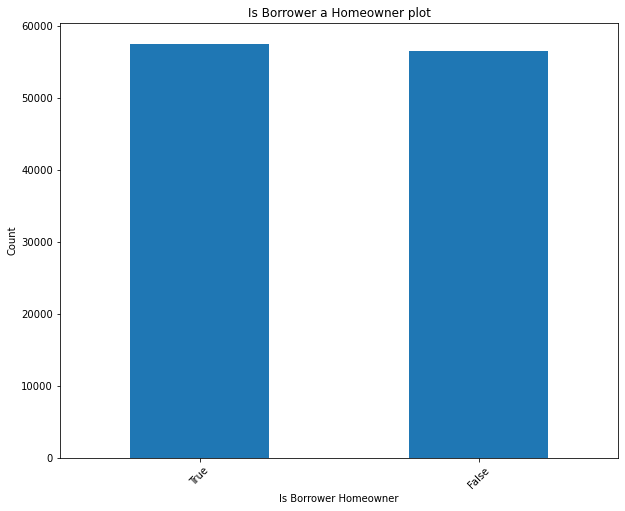

In [9]:
#Bar chart visualising the IsBorrowerHomeOwner feature
loan_data['IsBorrowerHomeowner'].value_counts().plot(kind='bar', figsize=(10,8));
plt.xlabel('Is Borrower Homeowner')
plt.ylabel('Count')
plt.title('Is Borrower a Homeowner plot')
plt.xticks(rotation=45)
plt.show()

>In the cell below I am carrying out a univariate analysis on the **Loan Status** variable inorder to visualize the loan status of loan applicants
The Loan Status feature contains categorical data so I would be using a bar chart to visualise.

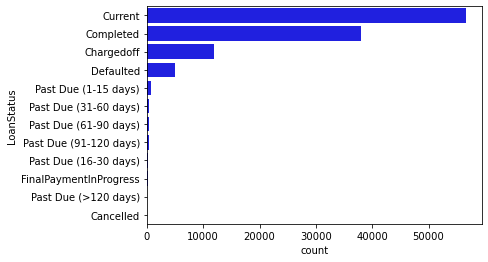

In [26]:
#Barchart of Loan status
type_order = loan_data['LoanStatus'].value_counts().index
sb.countplot(data=loan_data, y='LoanStatus',color='Blue', order=type_order);

>In the cell below I am carrying out a univariate analysis on the **Borrower APR** variable inorder to visualize the loan status of loan applicants
The Borrower APR feature contains quantitative data so I would be using a histogram to visualise.

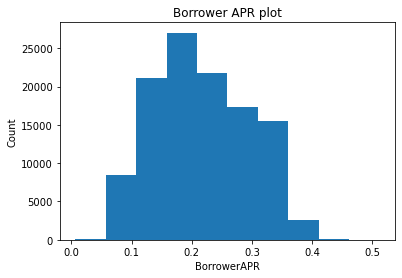

In [15]:
#histogram plot of Employment status duration
plt.hist(data = loan_data, x = 'BorrowerAPR');
plt.xlabel('BorrowerAPR')
plt.ylabel('Count')
plt.title('Borrower APR plot');


>In the cell below I am carrying out a univariate analysis on the **Employment Status Duration** variable inorder to visualize the employment duration of loan applicants.

>The Employment Status Duration feature contains quantitative data so I would be using a histogram to visualise.

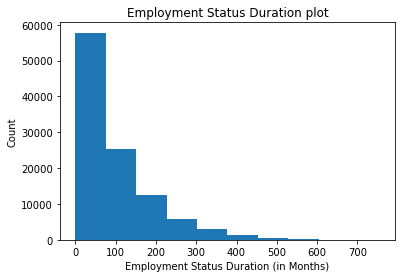

In [11]:
#histogram plot of Employment status duration
plt.hist(data = loan_data, x = 'EmploymentStatusDuration');
plt.xlabel('Employment Status Duration (in Months)')
plt.ylabel('Count')
plt.title('Employment Status Duration plot');


>In the cell below I am carrying out a univariate analysis on the _Occupation_ variable inorder to investigate what status the larger number of the population in the dataset falls under.
The _Occupation_ feature contains categorical data so I would be using a bar chart to visualise.

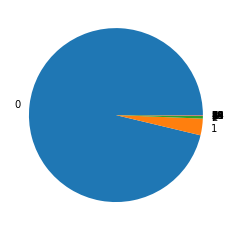

In [12]:
sorted_counts = loan_data['Recommendations'].value_counts()



plt.pie(sorted_counts, labels = sorted_counts.index);




>In the cell below I am carrying out a univariate analysis on the **Income Range** variable inorder to explore and visualize the income range of loan applicants.
The Income Range feature contains categorical data so I would be using a bar chart to visualise.

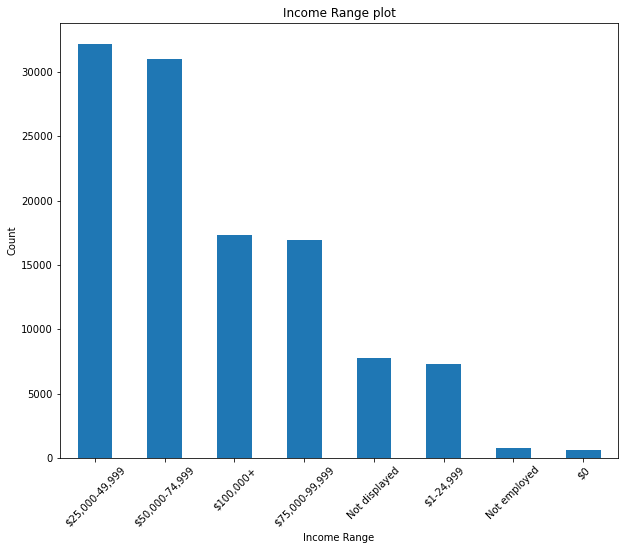

In [20]:
#Bar chart visualising the Income Range feature
loan_data['IncomeRange'].value_counts().plot(kind='bar', figsize=(10,8));
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Income Range plot')
plt.xticks(rotation=45)
plt.show()

>In the cell below I am carrying out a univariate analysis on the **Borrower Rate** variable inorder to explore and visualize the Borrower Rate of loan applicants.
The Borrower Rate feature contains quantitative data so I would be using a histogram to visualise.

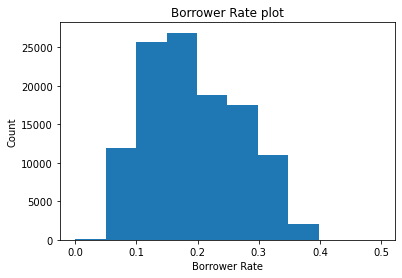

In [17]:
#histogram plot of Borrower Rate duration
plt.hist(data = loan_data, x = 'BorrowerRate');
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title('Borrower Rate plot');

>In the cell below I am carrying out a univariate analysis on the **Term** variable inorder to visualize the loan Term frequency.
The Term feature contains quantitative data so I would be using a pie chart to visualise the frequency.

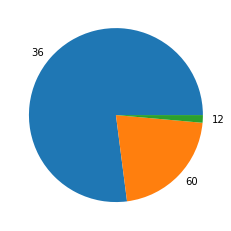

In [13]:
#pie chart showing the relative frequency of loan Terms

sorted_counts = loan_data['Term'].value_counts()


plt.pie(sorted_counts, labels = sorted_counts.index);




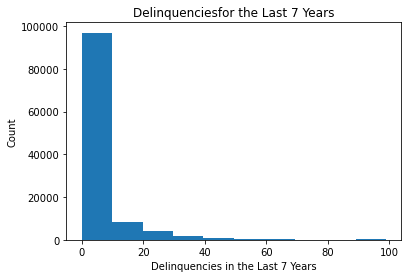

In [19]:
#histogram plot of DelinquenciesLast7Years duration
plt.hist(data = loan_data, x = 'DelinquenciesLast7Years');
plt.xlabel('Delinquencies in the Last 7 Years')
plt.ylabel('Count')
plt.title('Delinquenciesfor the Last 7 Years');



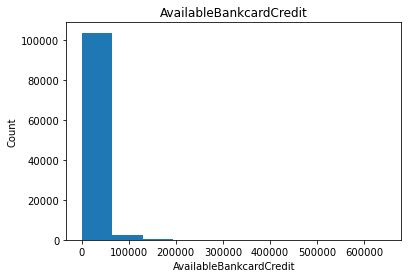

In [23]:
#histogram plot of CurrentDelinquencies duration
plt.hist(data = loan_data, x = 'AvailableBankcardCredit');
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('Count')
plt.title('AvailableBankcardCredit');




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<a id='multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

<a id='conclusion'></a>
## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

